#restart:0 out of 1
no data model. Assuming data is given by real experiment or other external source
checking factorization of model ...
... factorization (locally) describes directed acyclic graph
convergence criterion for E-step (tolerance on matrix changes):
0.0


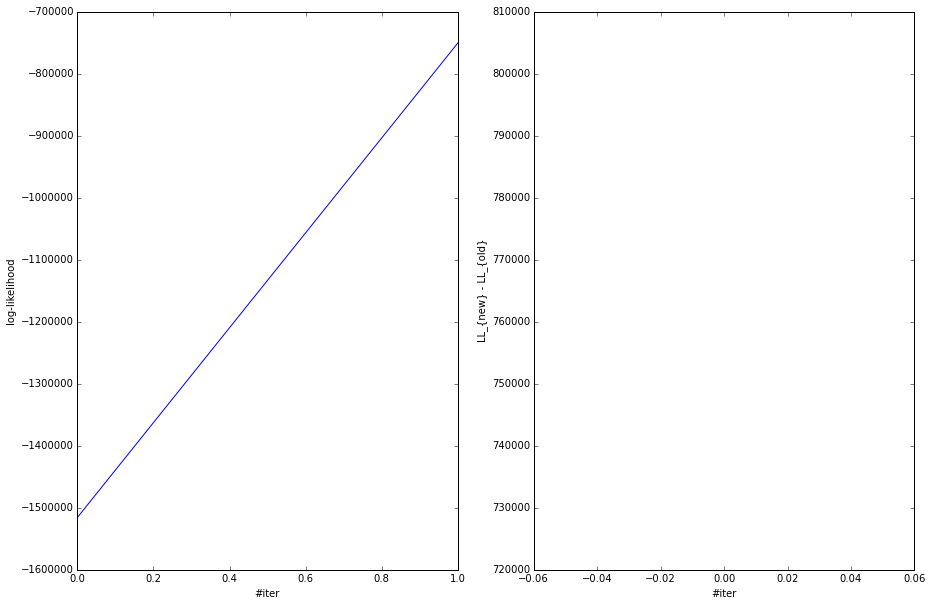

In [ ]:
import numpy as np
import scipy as sp
import matplotlib
import matplotlib.pyplot as plt

import ssm_timeSeries as ts  # my self-written time series overhead
import ssm_fit               # my self-written library for state-space model fitting
import ssm_scripts

import random
from datetime import datetime     # generate random seed for 
random.seed(datetime.now())       # np.random. Once this is fixed, all 
rngSeed = random.randint(0, 1000) # other 'randomness' is also fixed

%matplotlib inline


yDim = 6
xDim = 2
uDim = 0

T = 100000
Trial = 1

subpops = [list(range(0,yDim)), []]
obsPops = []
obsTime = []
for t in range(1,T+1):
    obsTime.append(t)
    if np.mod(t,2)==0:
        obsPops.append(0)
    elif np.mod(t,2)==1:
        obsPops.append(1)
    
obsScheme = {'subpops': subpops,
             'obsTime': obsTime,
             'obsPops': obsPops}

fitOptions = {'ifUseB' : False,  
              'maxIter': 5, 
              'ifPlotProgress' : True,
              'covConvEps' : 0 
             }

numRestart = 1
xOut = None
yOut = None
for i in range(numRestart):
    print('#restart:' + str(i) + ' out of ' + str(numRestart))
    sf = '/home/mackelab/Desktop/Projects/Stitching/results/test_problems/LDS_save_rerun_small_run' + str(i) + '.mat'
    [yOut,xOut,u,pars,initPars] = ssm_scripts.run(xDim, yDim, uDim, T, obsScheme, fitOptions,saveFile=sf,y=yOut,x=xOut)



In [1]:
import numpy as np
import scipy as sp
import matplotlib
import matplotlib.pyplot as plt
from scipy.io import savemat # store results for comparison with Matlab code   

import ssm_timeSeries as ts  # my self-written time series overhead
import ssm_fit               # my self-written library for state-space model fitting
import ssm_scripts

import random
from datetime import datetime     # generate random seed for 
random.seed(datetime.now())       # np.random. Once this is fixed, all 
rngSeed = random.randint(0, 1000) # other 'randomness' is also fixed

%matplotlib inline

yDim = 3
xDim = 1
uDim = 0

T = 100
Trial = 1

subpops = [list(range(0,yDim)), list(range(0,yDim))]

obsPops = []
obsTime = []
for t in range(T+1):
    obsTime.append(t)
    if np.mod(t,2)==0:
        obsPops.append(0)
    elif np.mod(t,2)==1:
        obsPops.append(1)
        

obsScheme = {'subpops': subpops,
             'obsTime': obsTime,
             'obsPops': obsPops}
[obsIdxG, idxgrps] = ssm_fit._computeObsIndexGroups(obsScheme,yDim)
obsScheme['obsIdxG'] = obsIdxG # add index groups and 
obsScheme['idxgrps'] = idxgrps # their occurences   

fitOptions = {'ifUseB' : False,  
              'maxIter': 50, 
              'ifPlotProgress' : True,
              'covConvEps' :0 
             }
pars = ssm_scripts.generatePars(xDim, yDim, uDim)
[x,y,u] = ssm_scripts.simulateExperiment(pars,T,Trial,obsScheme)
[A,B,Q,mu0, V0, C,d,R] = pars
Bu = np.zeros([A.shape[0], y.shape[1], y.shape[2]])

no data model. Assuming data is given by real experiment or other external source
checking factorization of model ...
... factorization (locally) describes directed acyclic graph


In [5]:
print(obsScheme)

{'subpops': [[0, 1, 2, 3, 4, 5], [0, 1, 2, 3, 4, 5]], 'obsIdxG': [[0], [0], [0], [0], [0], [0], [0], [0], [0], [0], [0], [0], [0], [0], [0], [0], [0], [0], [0], [0], [0], [0], [0], [0], [0], [0], [0], [0], [0], [0], [0], [0], [0], [0], [0], [0], [0], [0], [0], [0], [0], [0], [0], [0], [0], [0], [0], [0], [0], [0], [0]], 'idxgrps': [array([0, 1, 2, 3, 4, 5])], 'obsPops': [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1], 'obsTime': range(950, 1001)}


In [6]:
[mu,V,P,Pinv,logc,tCovConvFt] = ssm_fit._KalmanFilter(A,Bu,Q,mu0,V0,C,d,R,y,obsScheme,eps=0)

t:1, subpop #0
obsTime[i]:2
t:2, subpop #1
obsTime[i]:3
t:3, subpop #0
obsTime[i]:4
t:4, subpop #1
obsTime[i]:5
t:5, subpop #0
obsTime[i]:6
t:6, subpop #1
obsTime[i]:7
t:7, subpop #0
obsTime[i]:8
t:8, subpop #1
obsTime[i]:9
t:9, subpop #0
obsTime[i]:10
t:10, subpop #1
obsTime[i]:11
t:11, subpop #0
obsTime[i]:12
t:12, subpop #1
obsTime[i]:13
t:13, subpop #0
obsTime[i]:14
t:14, subpop #1
obsTime[i]:15
t:15, subpop #0
obsTime[i]:16
t:16, subpop #1
obsTime[i]:17
t:17, subpop #0
obsTime[i]:18
t:18, subpop #1
obsTime[i]:19
t:19, subpop #0
obsTime[i]:20
t:20, subpop #1
obsTime[i]:21
t:21, subpop #0
obsTime[i]:22
t:22, subpop #1
obsTime[i]:23
t:23, subpop #0
obsTime[i]:24
t:24, subpop #1
obsTime[i]:25
t:25, subpop #0
obsTime[i]:26
t:26, subpop #1
obsTime[i]:27
t:27, subpop #0
obsTime[i]:28
t:28, subpop #1
obsTime[i]:29
t:29, subpop #0
obsTime[i]:30
t:30, subpop #1
obsTime[i]:31
t:31, subpop #0
obsTime[i]:32
t:32, subpop #1
obsTime[i]:33
t:33, subpop #0
obsTime[i]:34
t:34, subpop #1
obsTime[i]:

In [7]:
[mu_h,V_h,J,tCovConvSm] = ssm_fit._KalmanSmoother(A, Bu, mu.copy(), V, P, Pinv, obsTime, tCovConvFt, eps=0)
[Ext, Extxt, Extxtm1]  = ssm_fit._KalmanParsToMoments(mu_h, V_h, J,obsTime,tCovConvFt,tCovConvSm)